<a href="https://colab.research.google.com/github/Said-Akbar/Data-science/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Logistic regression with gradient descent
The dataset is from Andrew Ng's Machine Learning MOOC, exercise on logistic regression

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
ex2 = pd.read_csv('ex2data1.txt', header=None, names=['X1', 'X2',  'y'])
ex2.head()

,X1,X2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [0]:
y = ex2['y']
X1 = ex2['X1']
X2 = ex2['X2']
stdx1 = np.std(X1)
meanx1= X1.mean()

X1 = (X1 - meanx1)/stdx1

stdx2 = np.std(X2)
meanx2= X2.mean()
X2 = (X2 - meanx2)/stdx2

X=np.c_[np.ones(X1.size),X1, X2]

y = np.array(y).reshape(len(y),1)

In [0]:
def sigmoid(hyp):
  return 1/(1+np.exp(-hyp))

In [0]:
1/(1+np.exp(-2))==sigmoid(2)

True

In [0]:
print(X.shape)
print(y.shape)

(100, 3)
(100, 1)


In [0]:
def cost_func(X,y,theta=[[0],[0],[0]]):
  m = y.size
  h = (sigmoid(X.dot(theta)))
  h_log = np.log(h)
  
  J = (-1/m)*(h_log.T.dot(y)+(np.log(1-h).T).dot(1-y)) # cost J for this particular set of thetas, T for y because 100x1 is not multiplicable by 100x1
  if np.isnan(J[0]):
        return(np.inf)
  return J[0]

In [0]:
cost_func(X,y)


array([0.69314718])

In [0]:
def grad_desc(X, y, theta=[[0],[0],[0]], alpha = 0.2,iters=10000): #changing alpha to 0.03 will diverge the gradient from minimum
  m = y.size
  J_hist = []
  parm=alpha * (1/m)

  for iternt in range(iters):
    h=X.dot(theta)
    theta = theta - parm * (X.T.dot(sigmoid(h)-y)) 
    J_hist.append(cost_func(X, y, theta))
  return theta, J_hist

[[1.71844407]
 [3.99277605]
 [3.72512532]]


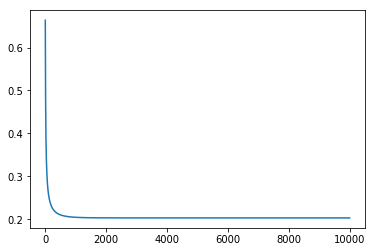

In [0]:
theta, cost = grad_desc(X,y)
print(theta)
plt.plot(cost)

In [0]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(np.c_[X1, X2],np.array(ex2['y']).reshape(len(y),1))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
print(lr.intercept_)
print(lr.coef_)

[0.89684257]
[[2.23646845 2.04111273]]


In [0]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [0]:
pred = predict(theta.T,X)
pred_sk = lr.predict(np.c_[X1, X2])

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
print('Our method accuracy:',accuracy_score(y, pred))
print('sklearn method accuracy:',accuracy_score(y, pred_sk))

Our method accuracy: 0.89
sklearn method accuracy: 0.89


In [0]:
from sklearn.model_selection import train_test_split
X_train, _, y_train, _ =train_test_split(X,y, test_size=0.3, random_state=101)


[[1.823371  ]
 [3.67531895]
 [3.66075992]]


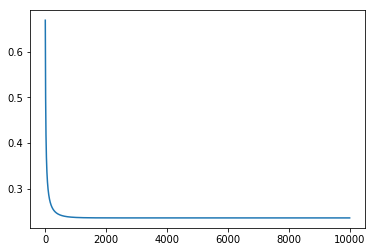

In [0]:
theta, cost = grad_desc(X_train,y_train)
print(theta)
plt.plot(cost)

In [0]:
pred=predict(theta.T, X_train)

In [0]:
print('Our method accuracy:',accuracy_score(y_train, pred))

Our method accuracy: 0.8857142857142857


In [0]:
lr.fit(np.c_[X1, X2],np.array(ex2['y']).reshape(len(y),1))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
lr.fit(X_train.T[1:].T,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
pred_sk = lr.predict(X_train.T[1:].T)
print('sklearn method accuracy:',accuracy_score(y_train, pred_sk))

sklearn method accuracy: 0.8857142857142857
